<a href="https://colab.research.google.com/github/Rofiatu/app_market_insights/blob/main/mobile_app_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANALYSING APP PROFITABILITY: USING DATA FROM GOOGLE PLAY AND APPLE STORE

In this project, we aim to assess revenue drivers, by analysing the level of user engagament and interaction with mobile applications, as a measure of profitability. We use metrics from Google Play Store and Apple Store, as reference.

The goal of this analysis is to analyze data in order to help our developers understand what type of apps are likely to attract more users, and make recommendations based on our findings.

The core questions this analysis aims to find answers to, include:

- Engagement: Which app categories show the highest user engagement based on installs and reviews?

- Opportunity: Which categories are relatively unsaturated yet show high user engagement?

- Demographics: Who are the primary users of these app categories (age, location, preferences) assessed by which content rating has the most engagement?

### DATA CLEANING AND PREPARATION

#### Import Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
colors = sns.color_palette('Dark2')

In [3]:
apple = pd.read_csv('AppleStore.csv')
android = pd.read_csv('googleplaystore.csv')

#### Clean Apple Data

To have a quick view of what some of the data looks like, I am going to view the first 2 rows in my dataset with the head method.

In [4]:
apple.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1


It is beneficial to know the size of data I'm working with, so I will print out the no. of rows and columns using the shape method.

In [5]:
apple.shape

(7197, 16)

To ascertain that the columns are cast correctly i.e., numerical columns are infact numerical, and categorical columns are categorical, I will use the info method in pandas to analyse my dataset.

This metric also highlights any missing values that my data may have.

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

The result of the info method reveals that there are no missing rows, and all my columns seem to be cast correctly.

To have a general sense of what my numerical data looks like, I will use the describe method to assess the statistical attributes of my data.

In [7]:
apple.describe()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In order to assess if there are any duplicate apps, I will use the value_counts method. My expectation is that each app should only appear once, but if that is not the case, I suspect they have been duplicated.

In [8]:
apple['track_name'].value_counts()

track_name
VR Roller Coaster                                   2
Mannequin Challenge                                 2
Facebook                                            1
iFleeing                                            1
Fear for Sale: The House on Black River (Full)      1
                                                   ..
PDF Converter - Convert Documents, Photos to PDF    1
Motion Math: Hungry Fish                            1
MindNode – Delightful Mind Mapping                  1
Skylanders SuperChargers                            1
みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~                 1
Name: count, Length: 7195, dtype: int64

In [9]:
apple['id'].value_counts()

id
284882215     1
586157728     1
1112551222    1
1106057049    1
1097998313    1
             ..
312266675     1
447444215     1
483049169     1
312220102     1
977965019     1
Name: count, Length: 7197, dtype: int64

Going by the result above, it appears 'VR Roller Coaster' and 'Mannequin Challenge' are duplicated. While the ID for each duplicated app name is unique, I believe it is more beneficial for our analysis if we streamline the data to only contain one data entry per app.

In order to assess the duplications on a case-by-case basis, I will create temporary variables for them to assess each one closely.

In addition, I notice the odd app name, which is not in English. I will consider dropping that column towards the end of my cleaning process.

In [10]:
mann = apple[apple['track_name'] == 'Mannequin Challenge']
mann

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


In [11]:
vr = apple[apple['track_name'] == 'VR Roller Coaster']
vr

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


The tables above, show that there are duplicate entries for both apps, but some metrics differ for each entry, as each entry relates to a different version of both apps.

I have decided to retain the metrics relating to the most recent app version for my analysis, and discard the other versions using the drop_duplicates_keep_first method. The rationale behind this decision is as follows:

- duplicated apps may distort the analysis and resulting metrics
- retaining information relating to the most recent version is likely more relevant to understaning current market trends and user engagement, as relating to the apps in question.

As a check, I have also printed the shape of my dataset to ensure that it is now reduced by 2 rows from the initial row size of 7197 and reprinted the temporary mannequin dataset 'mann', to ensure that the correct row was dropped.

In [12]:
apple = apple.drop_duplicates(subset=['track_name'], keep='first')
apple.shape

(7195, 16)

In [13]:
mann = apple[apple['track_name'] == 'Mannequin Challenge']
mann

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1


I will now proceed to review the other categorical columns, to find any anomalies that may exist therein, in terms of 'Nan' or odd values. I will use the unique and/or value_counts method for this purpose.

In [14]:
apple['prime_genre'].unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Utilities', 'Travel',
       'Shopping', 'News', 'Navigation', 'Lifestyle', 'Entertainment',
       'Food & Drink', 'Sports', 'Book', 'Finance', 'Education',
       'Productivity', 'Business', 'Catalogs', 'Medical'], dtype=object)

In [15]:
apple['cont_rating'].unique()

array(['4+', '12+', '9+', '17+'], dtype=object)

In [16]:
apple['ver'].value_counts()

ver
1.0        317
1.1        266
1.2        218
1.0.0      187
1.0.1      179
          ... 
16.13.0      1
5.03         1
8.3          1
4.11.10      1
1.0.2.5      1
Name: count, Length: 1589, dtype: int64

In [17]:
apple['currency'].unique()

array(['USD'], dtype=object)

The analysis above reveals that the values in the columns above contain reasonable and expected data, so barring any further observations, they should be good for analysis.

Further, from the result of the 'describe' method in cell 84, I observe that some of the apps on the list are not free. Since our company builds free apps, it is only reasonable that I steamline this anlaysis to cater to only free apps. As a result, I will extract the non-free-apps and drop them.

In [18]:
non_free_apps = apple[apple['price'] != 0]
non_free_apps

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
11,362949845,Fruit Ninja Classic,104590336,USD,1.99,698516,132,4.5,4.0,2.3.9,4+,Games,38,5,13,1
17,500116670,Clear Vision (17+),37879808,USD,0.99,541693,69225,4.5,4.5,1.1.3,17+,Games,43,5,1,1
18,479516143,Minecraft: Pocket Edition,147787776,USD,6.99,522012,1148,4.5,4.5,1.1,9+,Games,37,1,11,1
28,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
37,307727765,Doodle Jump,48741376,USD,0.99,395261,88,4.5,4.5,3.17.6,4+,Games,37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,1169325682,Bestshot: Take Clear Photos Automatically & Ea...,24675328,USD,0.99,0,0,0.0,0.0,2.0.2,4+,Photo & Video,37,0,2,1
7182,1070854722,Be-be-bears!,480781312,USD,2.99,0,0,0.0,0.0,1.0.2.5,4+,Games,35,5,13,1
7184,1173723621,弑仙问情,151494656,USD,0.99,0,0,0.0,0.0,1.0,9+,Games,40,5,1,1
7186,1169971902,Hey Duggee: We Love Animals,136347648,USD,2.99,0,0,0.0,0.0,1.2,4+,Games,40,5,1,1


In [19]:
apple = apple[apple['price'] == 0]
apple.shape

(4054, 16)

Finally, we need to eliminate app names not written in English, since our focus is on English apps. For that, I have included a function below that checks that no more than 3 special characters are in an app name.

I have chosen to use the 3-special-character threshold because I observed that some of the English apps have some special characters in them; e.g., index 7182 in call 95, with the excalamation mark. The hope is that this function eliminates most, if not all, non-English apps and also only minimally impacts the English apps with special characters.

In [20]:
def has_too_many_special_xters(name):
  '''
  This function checks the app names to flag those with more than 3 special characters.
  It is set to flag based on this criteria to reduce the chances of English apps with special characters being flagged.
  '''
  special_xters_count = sum(1 for char in name if ord(char) > 127)
  return special_xters_count > 3

apple['Flag'] = apple['track_name'].apply(has_too_many_special_xters)

review_apple_Flags = apple.loc[apple['Flag'] == True]
review_apple_Flags

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,Flag
813,445375097,爱奇艺PPS -《欢乐颂2》电视剧热播,224617472,USD,0.0,14844,0,4.0,0.0,6.3.3,17+,Entertainment,38,5,3,1,True
1193,405667771,"聚力视频HD-人民的名义,跨界歌王全网热播",90725376,USD,0.0,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1,True
1427,336141475,优酷视频,204959744,USD,0.0,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1,True
1518,425349261,网易新闻 - 精选好内容，算出你的兴趣,133134336,USD,0.0,4263,6,4.5,1.0,23.2,17+,News,37,4,2,1,True
1595,387682726,淘宝 - 随时随地，想淘就淘,309673984,USD,0.0,3801,6,4.0,4.0,6.7.2,4+,Shopping,37,1,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188,1079758987,【難問謎解き】ねこ神様はクイズ好き？,73467904,USD,0.0,0,0,0.0,0.0,2.1.6,4+,Book,37,3,1,1,True
7189,1070725569,【悲報】鬼ヶ島終了のお知らせ -ゾンビ桃太郎が3Dすぎて鬼やばいwww-,147131392,USD,0.0,0,0,0.0,0.0,1.0.1,12+,Games,40,4,1,1,True
7191,1069796800,Brain15 − 脳トレ 無料パズル −,8912896,USD,0.0,0,0,0.0,0.0,1.2,12+,Games,38,0,1,1,True
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,1.2,9+,Book,38,0,1,1,True


In [21]:
apple = apple[~apple['Flag']].drop(columns=['Flag'])
apple.shape

(3220, 16)

After cleaning our apple data by dropping duplicates relating to earlier versions of each app, non-english apps, and non-free apps, our apple data now contains only 3220 rows, a more than 50% reduction from the initial 7197 rows.

#### Clean Android Data

Similar to my apple data, I am going to view the first 2 rows of my android data to see what the data generally looks like.

In [22]:
android.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


I would also print the shape and information to assess the number of rows and columns; and characteristics of the data in each column.

In [23]:
android.shape

(10841, 13)

In [24]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


A review of the data characteristics in the android data reveals that there may be some wrong data in the rows resulting in some of the columns being wrongly classified as categorical instead of numerical. So, I will analyse each column further.

In addition to the observation above, the info method reveals that there are some missing values in the following columns: 'Rating', 'Type', 'Content Rating', 'Current Ver' and 'Android Ver'. I will review this and consider dropping the missing rows, to reduce distortions in the analysis.

In [25]:
print(android['Category'].unique())
print(android[android['Category'].isna()])

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


*The category column is in order; no odd categories and no null values. However, it might be useful to change the rows to Title Case, for the sake of uniformity*

In [26]:
android['Category'] = android['Category'].str.title()

In [27]:
print(android['Rating'].unique())
print(android[android['Rating'].isna()])

[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]
                                       App             Category  Rating  \
23                  Mcqueen Coloring pages       Art_And_Design     NaN   
113              Wrinkles and rejuvenation               Beauty     NaN   
123                 Manicure - nail design               Beauty     NaN   
126           Skin Care and Natural Beauty               Beauty     NaN   
129    Secrets of beauty, youth and health               Beauty     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              Medical     NaN   
10825                   Naruto & Boruto FR               Social     NaN   
10831             payermonstationnement.fr  Maps_And_Navigation     NaN   
10835                             FR Forms

In [28]:
android = android.dropna(subset=['Rating'])
android.shape

(9367, 13)

*The rating column has some null values, which have been eliminated using the dropna method.*

In [29]:
print(android['Reviews'].unique())
print(android[android['Reviews'].isna()])

['159' '967' '87510' ... '603' '1195' '398307']
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


*The reviews column appears to be in order, with no odd or null values.*

In [30]:
print(android['Size'].unique())
print(android[android['Size'].isna()])

['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '23M' '6.0M'
 '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device' '9.4M' '15M'
 '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M' '201k' '3.6M'
 '5.7M' '8.6M' '2.4M' '27M' '2.5M' '7.0M' '16M' '3.4M' '8.9M' '3.9M'
 '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M' '9.0M'
 '6.7M' '30M' '2.6M' '7.1M' '22M' '6.4M' '3.2M' '8.2M' '4.9M' '9.5M'
 '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M' '4.0M' '2.3M' '2.1M' '42M' '9.1M'
 '55M' '23k' '7.3M' '6.5M' '1.5M' '7.5M' '51M' '41M' '48M' '8.5M' '46M'
 '8.3M' '4.3M' '4.7M' '3.3M' '40M' '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M'
 '79k' '8.4M' '3.7M' '118k' '44M' '695k' '1.6M' '6.2M' '53M' '1.4M' '3.0M'
 '7.2M' '5.8M' '3.8M' '9.6M' '45M' '63M' '49M' '77M' '4.4M' '70M' '9.3M'
 '8.1M' '36M' '6.9M' '7.4M' '84M' '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M'
 '556k' '526k' '76M' '7.6M' '59M' '9.7M' '78M' '72M' '4

*The size column appears to be in order with no null or odd values.*

In [31]:
print(android['Installs'].unique())
print(android[android['Installs'].isna()])

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+' 'Free']
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


*The installs column appears to be in order, with no null or odd values.*

In [32]:
print(android['Type'].unique())
print(android[android['Type'].isna()])

['Free' 'Paid' '0']
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


*The type column has some odd values within. Reasonable expection for values in this column are: Free and Paid. The row containing '0' appears to be an error.*

*That said, there are no null values in the column.*

*In order to review the odd row, further, I will print it into a temporary variable called 'Review'.*

In [33]:
review = android[android['Type'] == '0']
review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


*Looking at the 'Review' table above, it appears the error starts from the Installs column, whose original value is missing, and has been overtaken by the value that should have been in the Type column. This mismatch of data continues through to the last column, which shows Nan in place of its original value.*

*To ensure that my analysis is error-free, I would eliminate this row. But before doing so, I will check the other columns to ensure there are no more mis-matches like the one above.*

In [34]:
print(android['Price'].unique())
print(android[android['Type'].isna()])

['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' 'Everyone'
 '$1.20']
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [35]:
print(android['Content Rating'].unique())
print(android[android['Content Rating'].isna()])

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [36]:
print(android['Genres'].unique())
print(android[android['Genres'].isna()])

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educational;Educatio

*Having confirmed that there are no other errors like the one in the 'Review' DF, I will now update the Android DF to only retain data relating to Free apps, since that is the focus of our analysis. What this does is that it eliminates the erroneous row with Index No. 10472, and also all paid apps in the dataset.*

In [37]:
android = android[android['Type'] == 'Free']
android.shape

(8719, 13)

Besides focusing on Free apps, we must also recall that we saw some non-English apps, which we should eliminate to ensure that our analysis caters to our goal as best as possible.

Since we are focused on ENGLISH apps that are FREE, and we have streamlined the android data to only contain free apps, we will now review our dataset to ensure that there are no non-English apps and if there are, we must eliminate them.

In [38]:
def has_too_many_special_xters(name):
  '''
  This function checks the app names to flag those with more than 3 special characters.
  It is set to flag based on this criteria to reduce the chances of English apps with special characters being flagged.
  '''
  special_xters_count = sum(1 for char in name if ord(char) > 127)
  return special_xters_count > 3

android['Flag'] = android['App'].apply(has_too_many_special_xters)

review_android_flags = android.loc[android['Flag'] == True]
review_android_flags

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Flag
710,Flame - درب عقلك يوميا,Education,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up,True
1592,သိင်္ Astrology - Min Thein Kha BayDin,Lifestyle,4.7,2225,15M,"100,000+",Free,0,Everyone,Lifestyle,"July 26, 2018",4.2.1,4.0.3 and up,True
3750,РИА Новости,News_And_Magazines,4.5,44274,8.0M,"1,000,000+",Free,0,Everyone,News & Magazines,"August 6, 2018",4.0.6,4.4 and up,True
4193,صور حرف H,Art_And_Design,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,True
4324,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",Lifestyle,4.0,45224,49M,"5,000,000+",Free,0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up,True
5346,Al Quran Free - القرآن (Islam),Books_And_Reference,4.7,1777,23M,"50,000+",Free,0,Everyone,Books & Reference,"February 15, 2015",1.1,2.2 and up,True
5698,日本AV历史,Books_And_Reference,4.1,215,30M,"10,000+",Free,0,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up,True
6006,বাংলা টিভি প্রো BD Bangla TV,Family,4.3,193,14M,"10,000+",Free,0,Everyone,Entertainment,"April 29, 2017",1.3,4.0 and up,True
6406,BL 女性向け恋愛ゲーム◆俺プリクロス,Family,4.2,3379,62M,"100,000+",Free,0,Mature 17+,Simulation,"March 23, 2017",1.6.3,2.3.3 and up,True
6415,SecondSecret ‐「恋を読む」BLノベルゲーム‐,Game,4.4,1563,40M,"50,000+",Free,0,Teen,Adventure,"June 29, 2017",1.3.6,4.0 and up,True


In [39]:
# now, we will restrict the android data to only contain entries where the Flag is set to False, and also drop the Flag column since it is no longer useful

android = android[~android['Flag']].drop(columns=['Flag'])
android.shape

(8691, 13)

Further, having addressed most of the anomalies within my dataset, I will now cast the numerical columns into the Integer datatype, to ease other cleaning processes.

However, before doing so, I will need to eliminate the special characters in the Install column, since it is a useful metric that will be more beneficial as a numeric column rather than a categorical column.

While the '+' symbol suggests that the values are only an estimate, without any additional information, the values can only be useful for our analysis if taken as is; that is, 100,000+ downloads should suffice for analysis as 100,000 downloads.

In [40]:
android['Installs'] = android['Installs'].str.replace('[+,]', '', regex=True)

In [41]:
android['Installs'] = android['Installs'].astype(int)
android['Reviews'] = android['Reviews'].astype(int)
android['Price'] = android['Price'].astype(int)
android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8691 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8691 non-null   object 
 1   Category        8691 non-null   object 
 2   Rating          8691 non-null   float64
 3   Reviews         8691 non-null   int64  
 4   Size            8691 non-null   object 
 5   Installs        8691 non-null   int64  
 6   Type            8691 non-null   object 
 7   Price           8691 non-null   int64  
 8   Content Rating  8691 non-null   object 
 9   Genres          8691 non-null   object 
 10  Last Updated    8691 non-null   object 
 11  Current Ver     8688 non-null   object 
 12  Android Ver     8690 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 950.6+ KB


At this stage, I now wish to ascertain if there are any duplicates within the dataset. For this, I will use the value_counts method, since I expect each app to only appear once.

In [42]:
android['App'].value_counts()

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
ESPN                                                 7
                                                    ..
HPlus                                                1
Guns - Shot Sounds                                   1
Offroad Car H                                        1
HSPA+ Tweaker (3G booster)                           1
iHoroscope - 2018 Daily Horoscope & Astrology        1
Name: count, Length: 7566, dtype: int64

The analysis above, shows that there are a number of apps with duplicated information. In order to get further insight into this, I will print out a temporary DF for ROBLOX.

In [43]:
roblox = android[android['App'] == 'ROBLOX']
roblox

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,Game,4.5,4447388,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,Game,4.5,4447346,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,Game,4.5,4448791,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,Game,4.5,4449882,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,Game,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,Family,4.5,4449910,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,Family,4.5,4450855,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,Family,4.5,4450890,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,Family,4.5,4443407,67M,100000000,Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Looking at the analysis of the Roblox DF above, I see that the number of reviews per entry differs. I would have adopted a similar approach to the Apple data but the app version in this case is same across all entries. As a result of this, I would only retain entries with the highest number of reviews per app, as this might represent the most recent data for each app.

In [44]:
android = android.loc[android.groupby('App')['Reviews'].idxmax()]
android.shape

(7566, 13)

To ensure that all duplicates have been successfully eliminated, I will recheck the value_counts for each app below. I expect the count for each app to be 1.

In [45]:
android['App'].value_counts()

App
+Download 4 Instagram Twitter                         1
Nasty Goats                                           1
Neon Blue Gaming Wallpaper&Theme fo Lenovo K8 Note    1
Nemours CareConnect                                   1
Neighborhoods & Apartments                            1
                                                     ..
Dolphin Browser - Fast, Private & Adblock🐬            1
Dollhouse Decorating Games                            1
Dollar General - Digital Coupons, Ads And More        1
Doll House Design & Decoration 2: Girls House Game    1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍      1
Name: count, Length: 7566, dtype: int64

As a final step, I will re-check to see if all null values have been dealt with, and if not, eliminate the remainder.

In [46]:
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       3
Android Ver       1
dtype: int64

In [47]:
android = android.dropna(subset=['Current Ver', 'Android Ver'])
android.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [48]:
android.shape

(7562, 13)

After cleaning the Android Data, we now have 7562 rows of potentially useful data, a reduction from the initial 10841 rows.

### DATA EXPLORATION

#### Analysing the Apple Market

In [49]:
apple.head(2)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1


*Question 1: What kinds of free apps are mostly available on App store based on our dataset? In terms of rating and genre?*

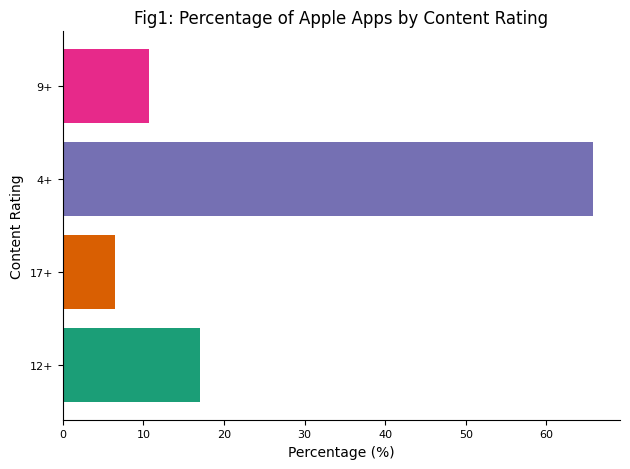

In [50]:
# Group data by 'cont_rating' and get the counts
apple_cont_rating_counts = apple.groupby('cont_rating').size()

# Convert counts to percentages
total_cont_rating_count = apple_cont_rating_counts.sum()
apple_cont_rating_percentages = (apple_cont_rating_counts / total_cont_rating_count) * 100

# Create the horizontal bar plot
plt.barh(apple_cont_rating_percentages.index, apple_cont_rating_percentages.values, color=colors)

# Customize the plot
plt.xlabel('Percentage (%)')
plt.ylabel('Content Rating')
plt.title('Fig1: Percentage of Apple Apps by Content Rating')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

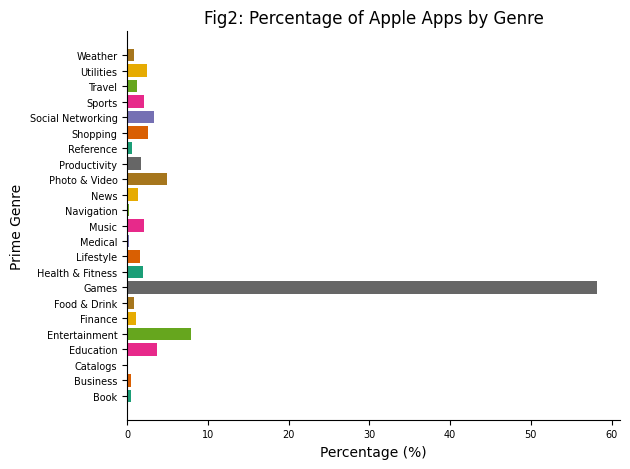

In [51]:
# Group data by 'genre' and get the counts
apple_genre_counts = apple.groupby('prime_genre').size()

# Convert counts to percentages
total_count = apple_genre_counts.sum()
apple_genre_percentages = (apple_genre_counts / total_count) * 100

# Create the horizontal bar plot
plt.barh(apple_genre_percentages.index, apple_genre_percentages.values, color=colors)

# Customize the plot
plt.xlabel('Percentage (%)', fontsize=10)
plt.ylabel('Prime Genre', fontsize=10)
plt.title('Fig2: Percentage of Apple Apps by Genre', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

*Question 2: Which genres and content are users engaging with the most?*

In order to assess potential opportunities within the Apple Market, I will analyse app availability versus user engagement using the following metrics:

- Total Reviews
- Average Total Reviews

*Total Reviews* captures the sheer volume of user feedback and correlates with app popularity. While this is a good metric, it can significantly be impaired by too few dominant apps creating an illusion of a category being more widely accepted than it is.

*Average Total Reviews* reflects the sentiment or perception of interest in the apps within a category, among its users. This metric provides a better understanding of user behaviour when assessed alongside the Total Reviews metric; although, it, too, can be influenced by the number of apps in the category.

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/3186468474.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(apple_category_metricsTR['prime_genre'], rotation=45, ha='right')


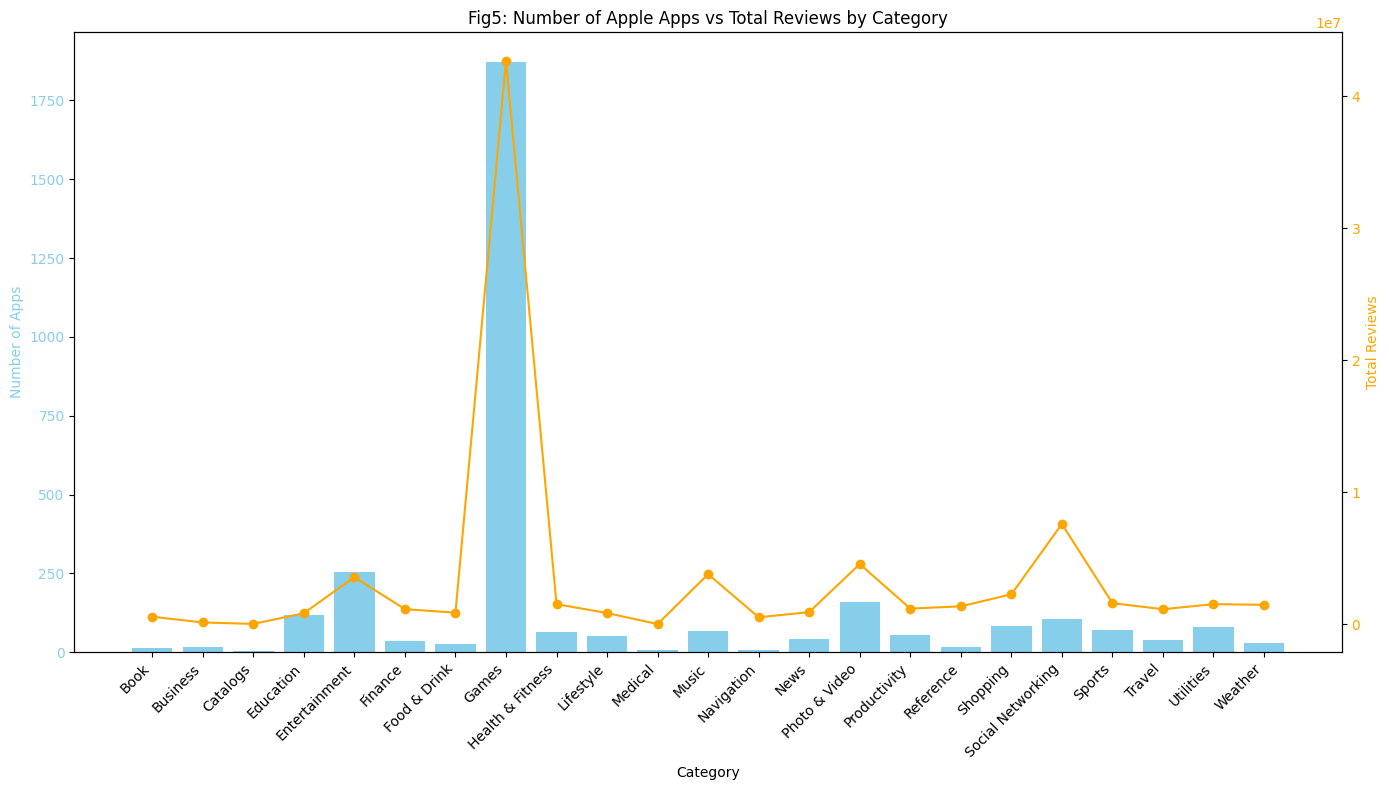

In [52]:
# Apple Category Metrics by Total Reviews
apple_category_metricsTR = apple.groupby('prime_genre').agg({
    'rating_count_tot': 'sum',    # Total reviews per category
    'track_name': 'count'       # Number of apps per category
}).rename(columns={'track_name': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(apple_category_metricsTR['prime_genre'], apple_category_metricsTR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Category')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(apple_category_metricsTR['prime_genre'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(apple_category_metricsTR['prime_genre'], apple_category_metricsTR['rating_count_tot'], color='orange', label='Total Reviews', marker='o')
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig5: Number of Apple Apps vs Total Reviews by Category')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/118142190.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(apple_category_metricsAR['prime_genre'], rotation=45, ha='right')


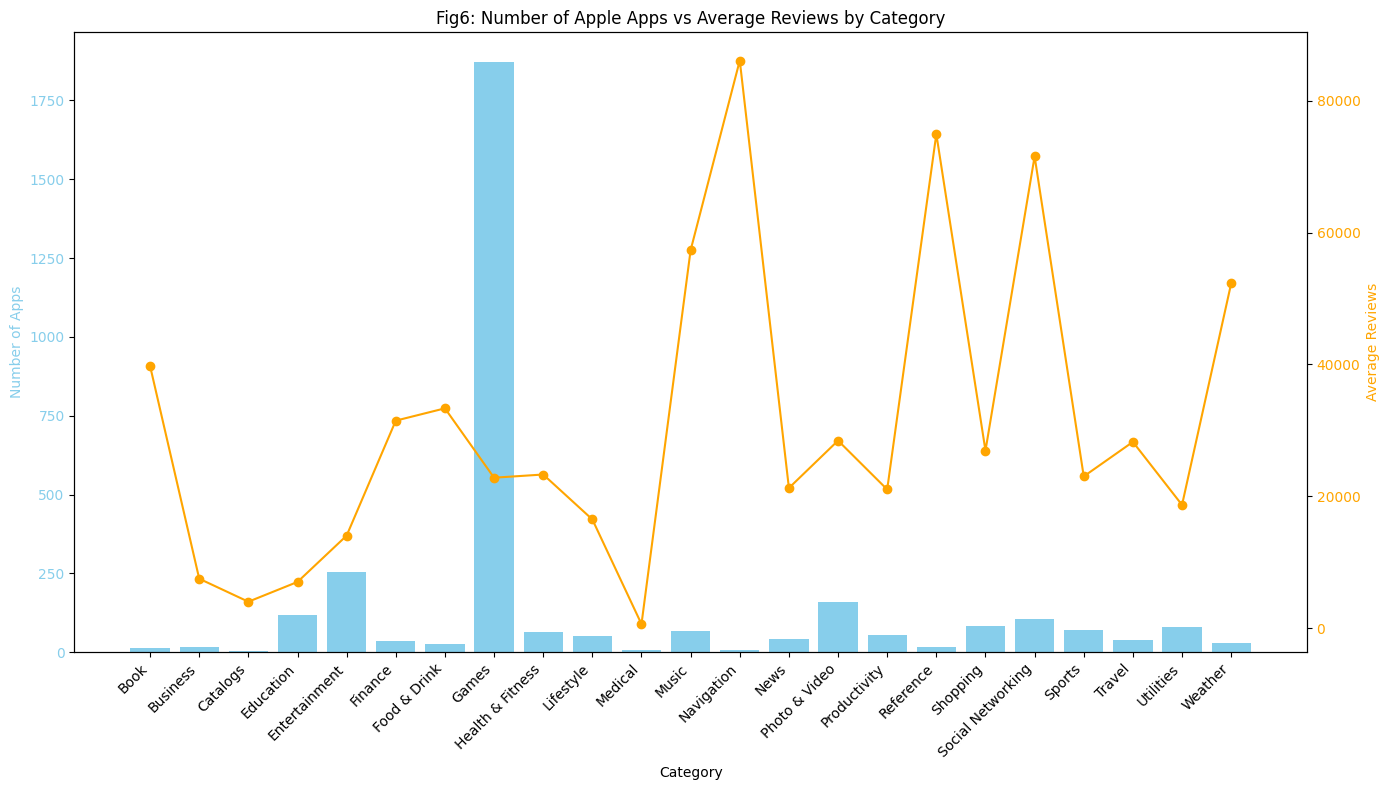

In [53]:
# Apple Category Metrics by Average Reviews
apple_category_metricsAR = apple.groupby('prime_genre').agg({
    'rating_count_tot': 'mean',    # Average reviews per category
    'track_name': 'count'       # Number of apps per category
}).rename(columns={'track_name': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(apple_category_metricsAR['prime_genre'], apple_category_metricsAR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Category')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(apple_category_metricsAR['prime_genre'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(apple_category_metricsAR['prime_genre'], apple_category_metricsAR['rating_count_tot'], color='orange', label='Total Reviews', marker='o')
ax2.set_ylabel('Average Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig6: Number of Apple Apps vs Average Reviews by Category')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/18287349.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(apple_content_metricsTR['cont_rating'], rotation=45, ha='right')


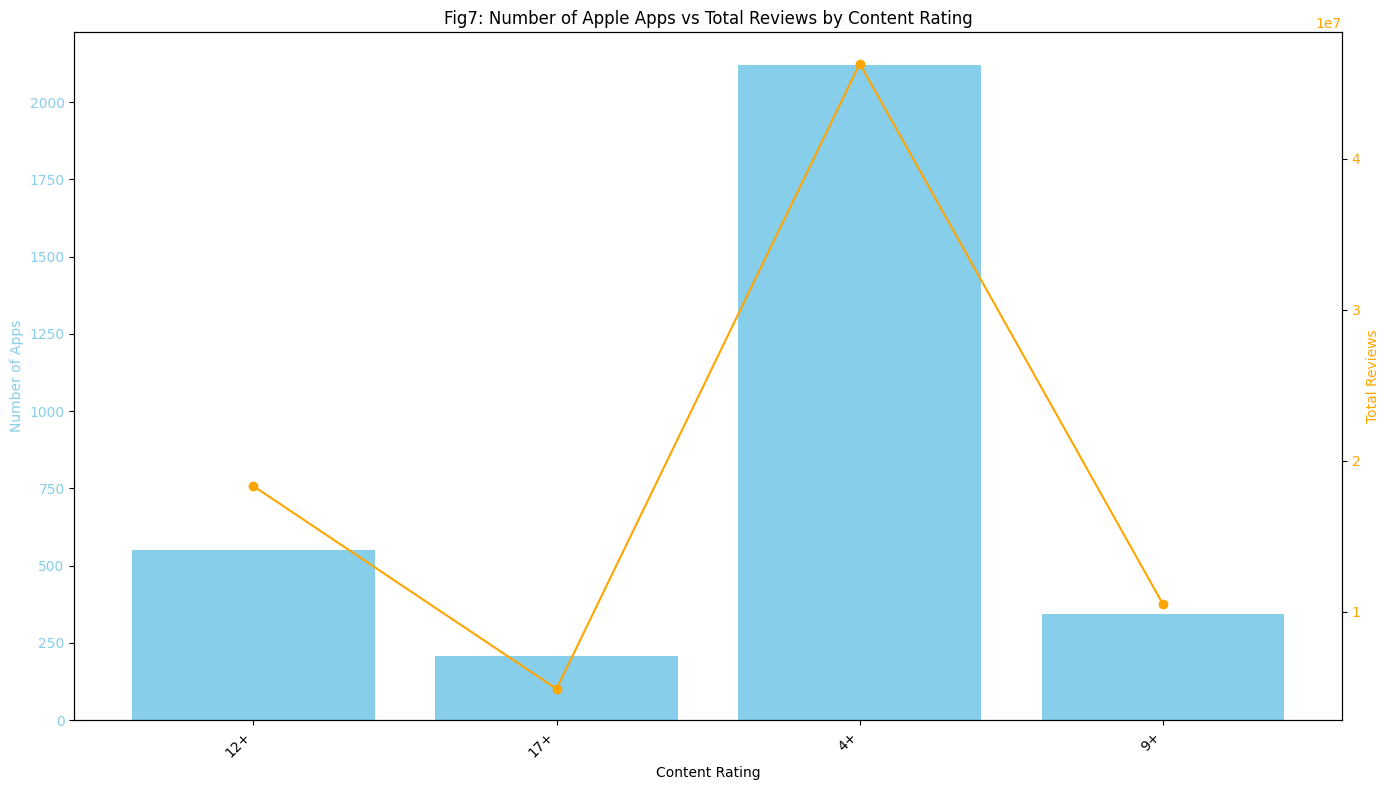

In [54]:
# Apple Content Metrics by Total Review
apple_content_metricsTR = apple.groupby('cont_rating').agg({
    'rating_count_tot': 'sum',    # Total reviews per cont_rating
    'cont_rating': 'count'       # Number of apps per cont_rating
}).rename(columns={'cont_rating': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(apple_content_metricsTR['cont_rating'], apple_content_metricsTR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Content Rating')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(apple_content_metricsTR['cont_rating'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(apple_content_metricsTR['cont_rating'], apple_content_metricsTR['rating_count_tot'], color='orange', label='Total Reviews', marker='o')
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig7: Number of Apple Apps vs Total Reviews by Content Rating')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/3710683096.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(apple_content_metricsAR['cont_rating'], rotation=45, ha='right')


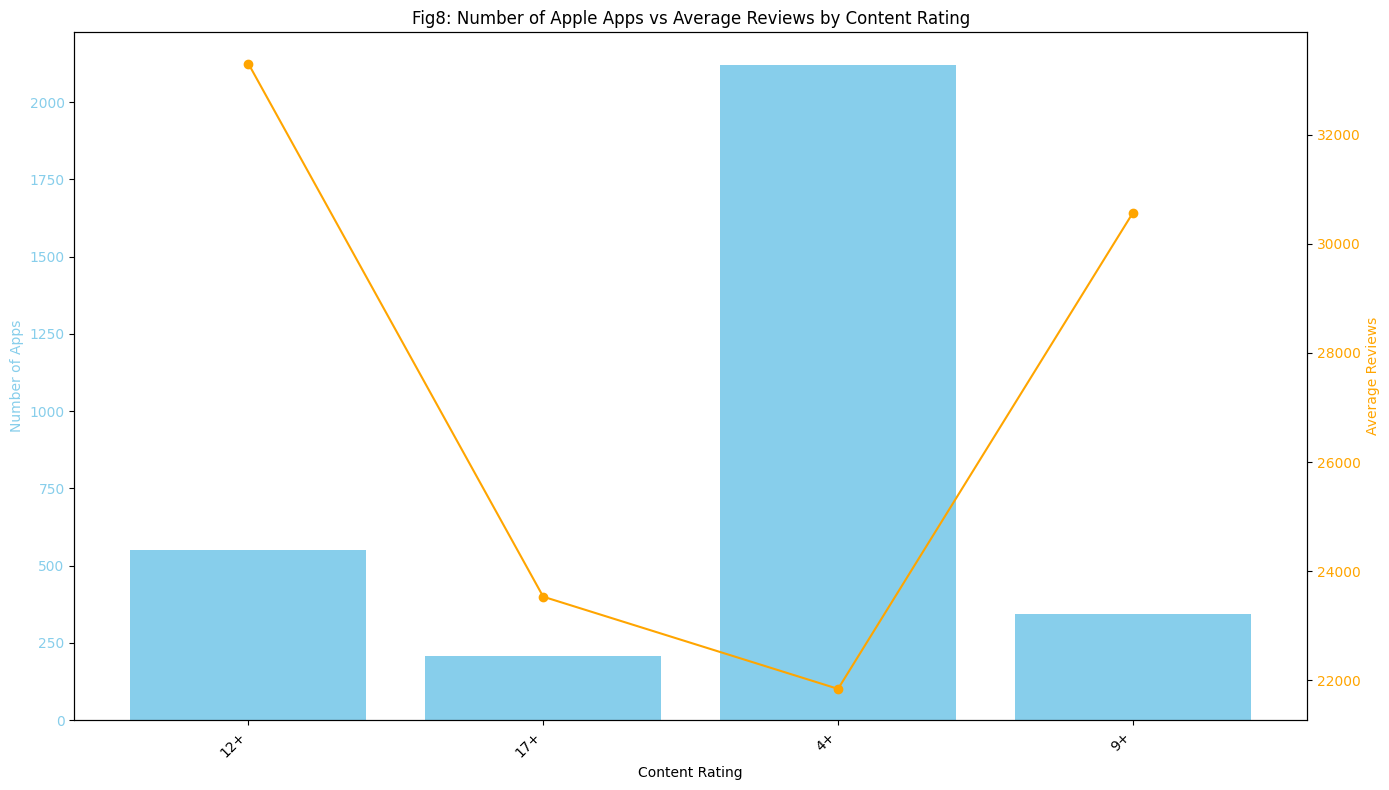

In [55]:
# Apple Content Metrics by Average Reviews
apple_content_metricsAR = apple.groupby('cont_rating').agg({
    'rating_count_tot': 'mean',    # Total reviews per cont_rating
    'cont_rating': 'count'       # Number of apps per cont_rating
}).rename(columns={'cont_rating': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(apple_content_metricsAR['cont_rating'], apple_content_metricsAR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Content Rating')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(apple_content_metricsAR['cont_rating'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(apple_content_metricsAR['cont_rating'], apple_content_metricsAR['rating_count_tot'], color='orange', label='Total Reviews', marker='o')
ax2.set_ylabel('Average Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig8: Number of Apple Apps vs Average Reviews by Content Rating')
fig.tight_layout()
plt.show()

#### Analysing the Google Market

In [56]:
android.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8532,+Download 4 Instagram Twitter,Social,4.5,40467,22M,1000000,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,Comics,3.5,115,9.1M,10000,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up


*Question 1: What kinds of free apps are mostly available on Google playstore store based on our dataset? In terms of content rating and category?*

*It is worth noting that the Category column is used instead of the Genres column, because the latter appears to be a more granular version of the former, which may not be best suited for the purpose of this analysis.*

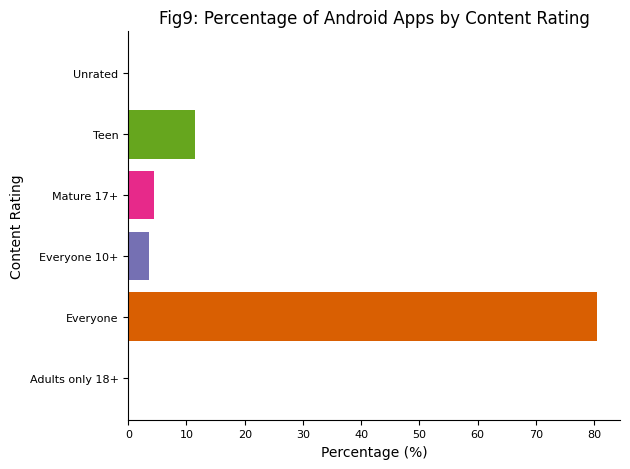

In [57]:
# Group data by 'content_rating' and get the counts
android_cont_rating_counts = android.groupby('Content Rating').size()

# Convert counts to percentages
total_android_ratings_count = android_cont_rating_counts.sum()
android_genre_percentages = (android_cont_rating_counts / total_android_ratings_count) * 100

# Create the horizontal bar plot
plt.barh(android_genre_percentages.index, android_genre_percentages.values, color=colors)

# Customize the plot
plt.xlabel('Percentage (%)')
plt.ylabel('Content Rating')
plt.title('Fig9: Percentage of Android Apps by Content Rating')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

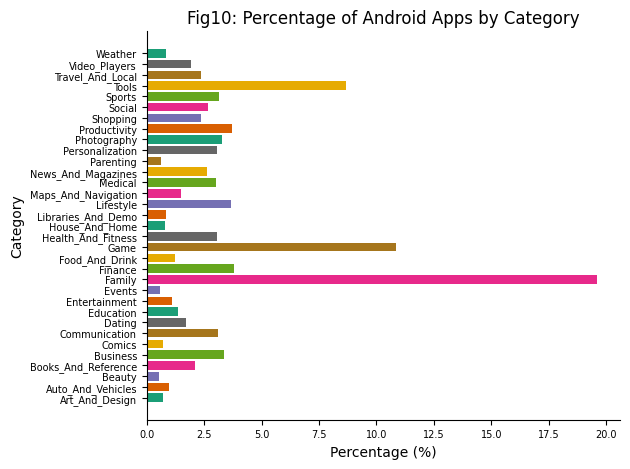

In [58]:
# Group data by 'genre' and get the counts
android_category_counts = android.groupby('Category').size()

# Convert counts to percentages
total_android_category_count = android_category_counts.sum()
android_category_percentages = (android_category_counts / total_android_category_count) * 100

# Create the horizontal bar plot
plt.barh(android_category_percentages.index, android_category_percentages.values, color=colors)

# Customize the plot
plt.xlabel('Percentage (%)', fontsize=10)
plt.ylabel('Category', fontsize=10)
plt.title('Fig10: Percentage of Android Apps by Category', fontsize=12)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

*Question 2: Which category have users interacted with the most, measured by the highest total rating volume across apps in our dataset?*

In [59]:
rating_count_per_android_category = android.groupby('Category', as_index=False)['Reviews'].sum()
rating_count_per_android_category = rating_count_per_android_category.sort_values(by='Reviews', ascending=False)
most_rated_android_genres = rating_count_per_android_category.head(10)
most_rated_android_genres

,Category,Reviews
14,Game,589194817
6,Communication,285739413
29,Tools,229294883
27,Social,227935782
11,Family,189624800
24,Photography,105465205
31,Video_Players,67630581
25,Productivity,55418800
23,Personalization,53249469
26,Shopping,44553394


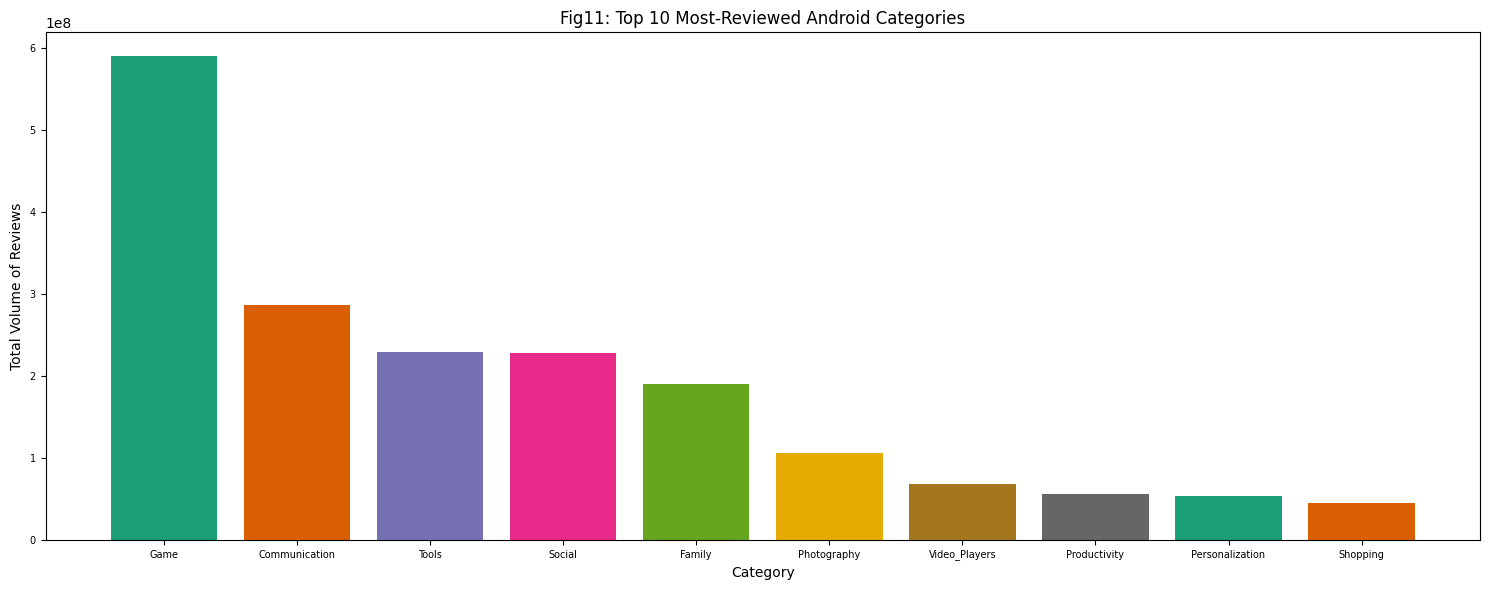

In [60]:
plt.figure(figsize=(15, 6))
plt.bar(most_rated_android_genres['Category'], most_rated_android_genres['Reviews'], color=colors)
plt.title('Fig11: Top 10 Most-Reviewed Android Categories')
plt.xlabel('Category')
plt.ylabel('Total Volume of Reviews')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

*Question 3: Which content_rating have users interacted with the most, measured by the highest total rating volume in the Google Play store?*

In [61]:
engagement_by_android_content = android.groupby('Content Rating', as_index=False)['Reviews'].sum()
engagement_by_android_content = engagement_by_android_content.sort_values(by='Reviews', ascending=False)
most_rated_android_content = engagement_by_android_content.head(10)
most_rated_android_content

,Content Rating,Reviews
1,Everyone,1299489075
4,Teen,502725642
2,Everyone 10+,198578743
3,Mature 17+,86249114
0,Adults only 18+,81348
5,Unrated,1186


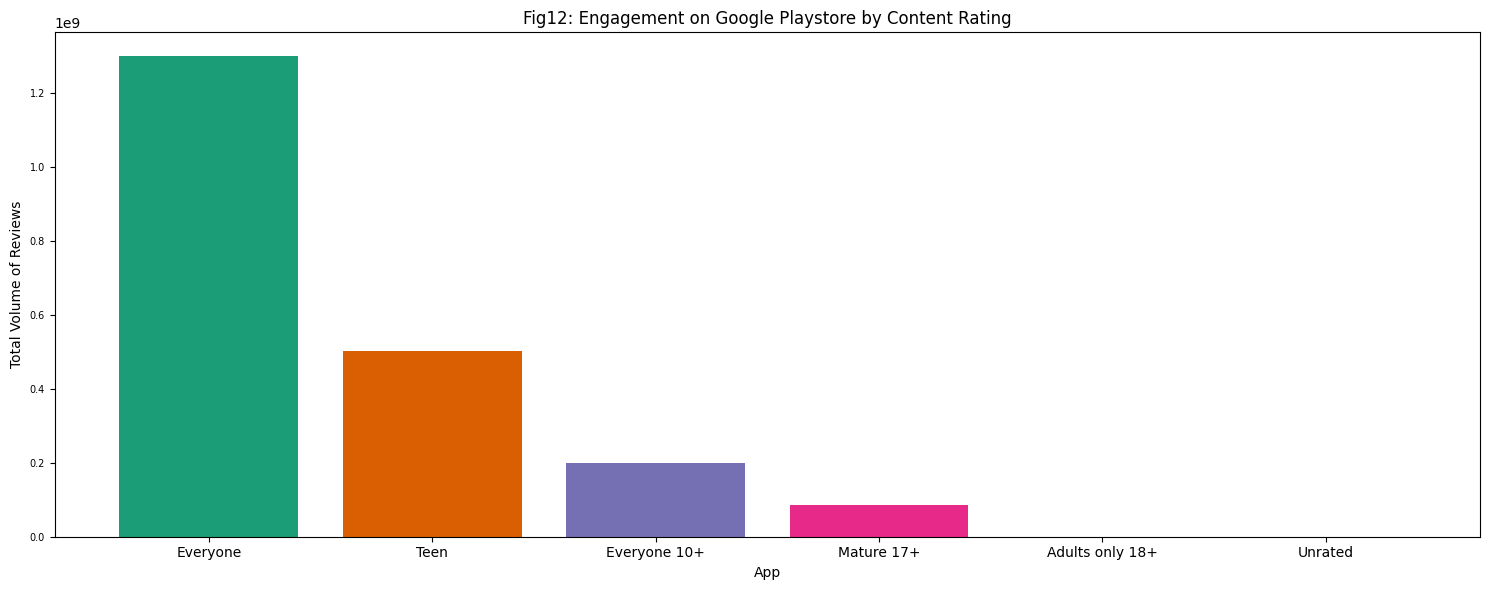

In [62]:
plt.figure(figsize=(15, 6))
plt.bar(most_rated_android_content['Content Rating'], most_rated_android_content['Reviews'], color=colors)
plt.title('Fig12: Engagement on Google Playstore by Content Rating')
plt.xlabel('App')
plt.ylabel('Total Volume of Reviews')

plt.yticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

*Question 4: Which categories have users installed the most?*

In [63]:
android_category_installation = android.groupby('Category', as_index=False)['Installs'].sum()
android_category_installation = android_category_installation.sort_values(by='Installs', ascending=False)
top_installed_android_categories = android_category_installation.head(10)
top_installed_android_categories

,Category,Installs
14,Game,13436708455
6,Communication,11036881530
29,Tools,8098497680
11,Family,6193352760
25,Productivity,5791609370
27,Social,5487835475
24,Photography,4656264610
31,Video_Players,3931726200
30,Travel_And_Local,2894677300
21,News_And_Magazines,2368089150


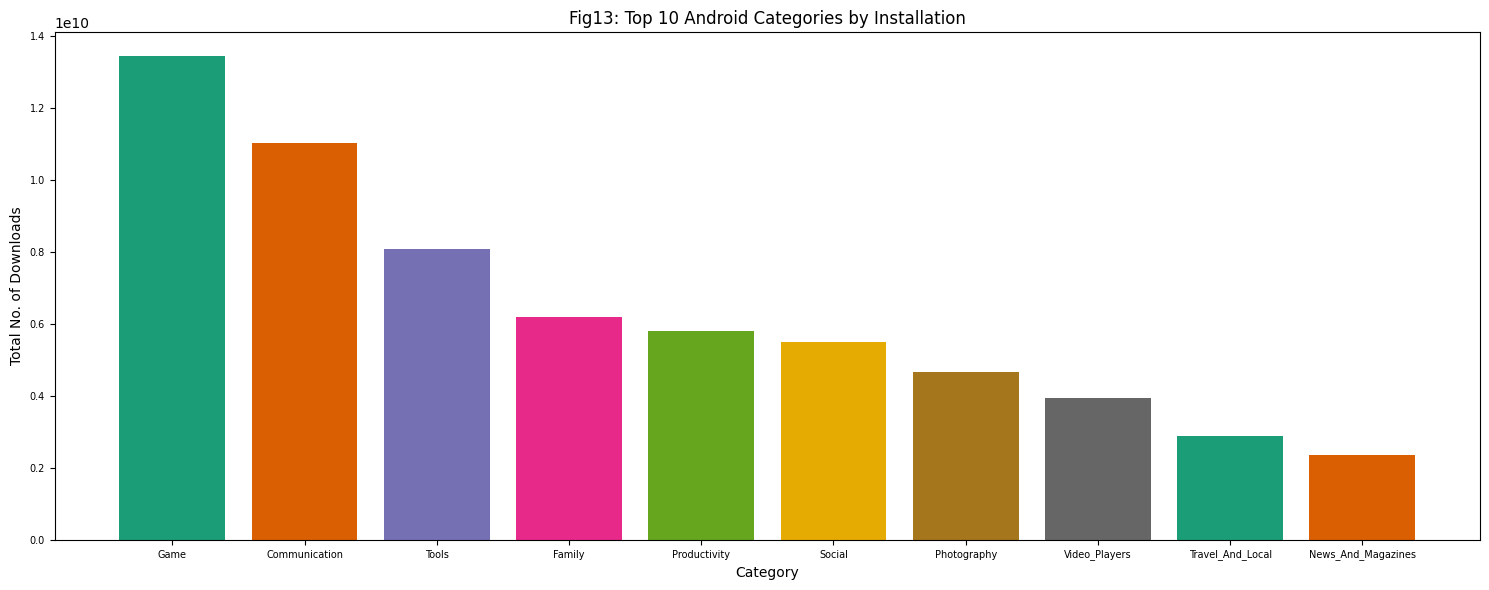

In [64]:
plt.figure(figsize=(15, 6))
plt.bar(top_installed_android_categories['Category'], top_installed_android_categories['Installs'], color=colors)
plt.title('Fig13: Top 10 Android Categories by Installation')
plt.xlabel('Category')
plt.ylabel('Total No. of Downloads')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

*Question 5: Which content_rating have users installed the most?*

In [65]:
android_installation_by_content = android.groupby('Content Rating', as_index=False)['Installs'].sum()
android_installation_by_content = android_installation_by_content.sort_values(by='Installs', ascending=False)
top_installed_android_content = android_installation_by_content.head(10)
top_installed_android_content

,Content Rating,Installs
1,Everyone,52337505686
4,Teen,16476395140
2,Everyone 10+,4001635710
3,Mature 17+,2426230320
0,Adults only 18+,2000000
5,Unrated,50000


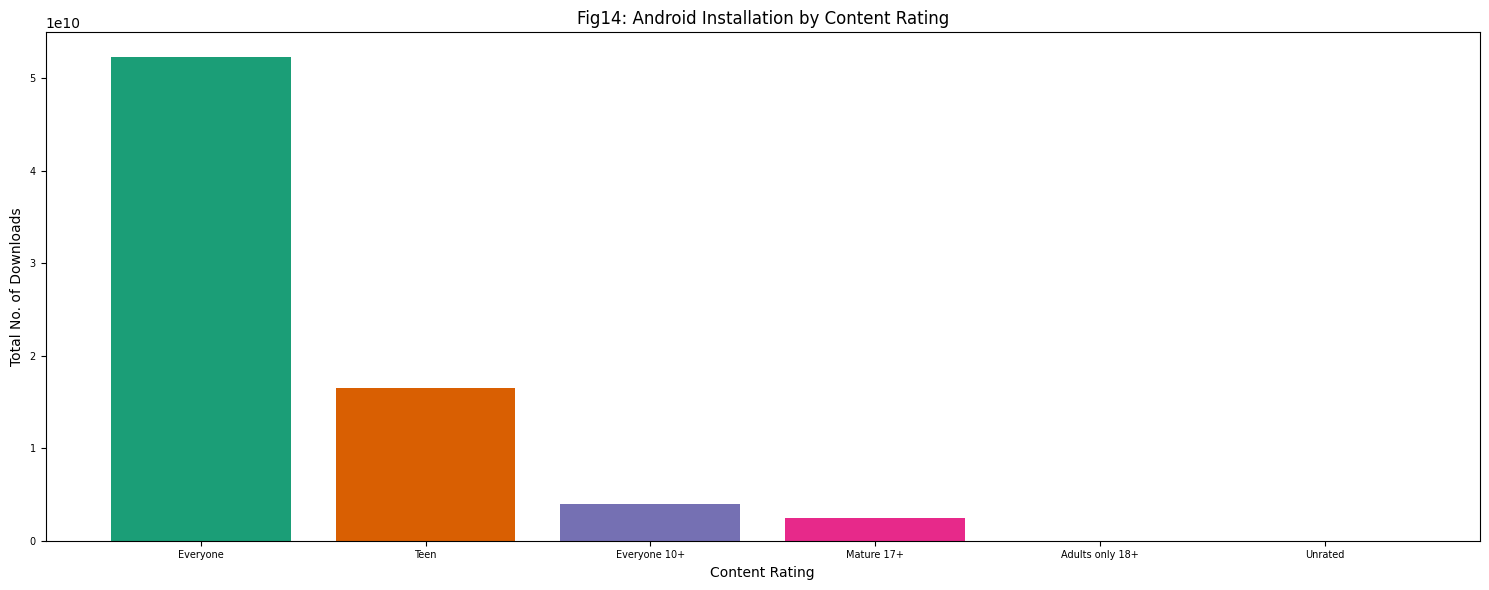

In [66]:
plt.figure(figsize=(15, 6))
plt.bar(top_installed_android_content['Content Rating'], top_installed_android_content['Installs'], color=colors)
plt.title('Fig14: Android Installation by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Total No. of Downloads')

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

*Question 6: Which genres and content are users TRULY engaging with the most?*

In order to assess potential opportunities within the Apple Market, I will do a deeper analysis of app availability versus user engagement using the following metrics:

- Total Reviews
- Average Total Reviews

*Total Reviews* captures the sheer volume of user feedback and correlates with app popularity.

*Average Total Reviews* reflects the sentiment or quality perception of the app among its users.

It is worth noting that the decision to assess engagement by number of reviews instead of number of installations is to achieve a level of uniformity between the Android and Apple market, to the extent of data available for both markets.

Further, an analysis of the correlation between the number of reviews and installations provides some comfort that, for the purpose of my analysis, I can rely on the insights provided by either metric to generate some insights about the other metric.

Correlation Coefficient: 0.6233979199502764


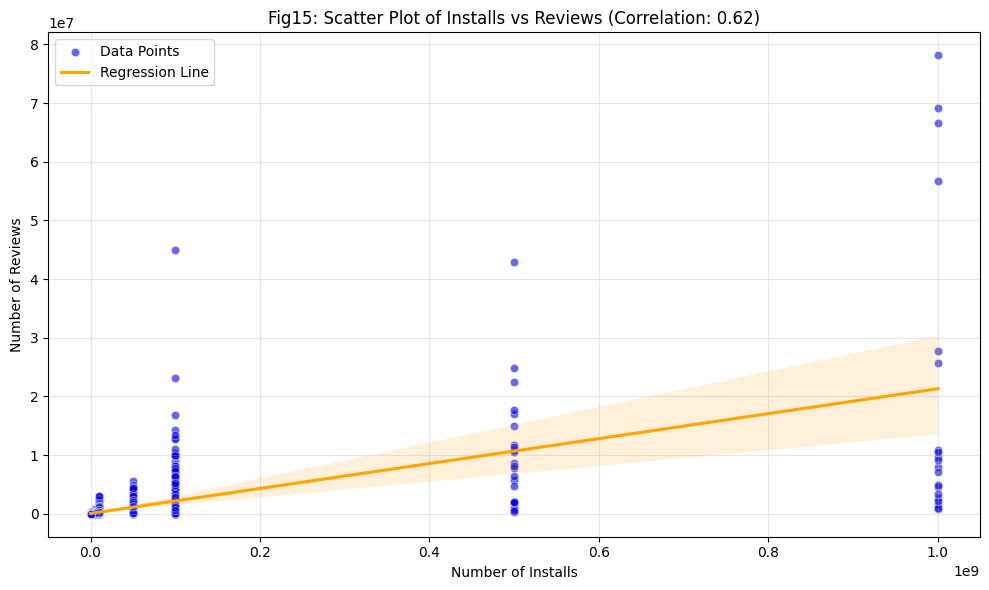

In [67]:
# Calculate the correlation coefficient
correlation = android['Installs'].corr(android['Reviews'])
print(f"Correlation Coefficient: {correlation}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=android, x='Installs', y='Reviews', alpha=0.6, color='blue', label='Data Points')
sns.regplot(data=android, x='Installs', y='Reviews', scatter=False, color='orange', label='Regression Line')

# Customize the plot
plt.title(f"Fig15: Scatter Plot of Installs vs Reviews (Correlation: {correlation:.2f})")
plt.xlabel('Number of Installs')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/1449753487.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(android_category_metricsTR['Category'], rotation=45, ha='right')


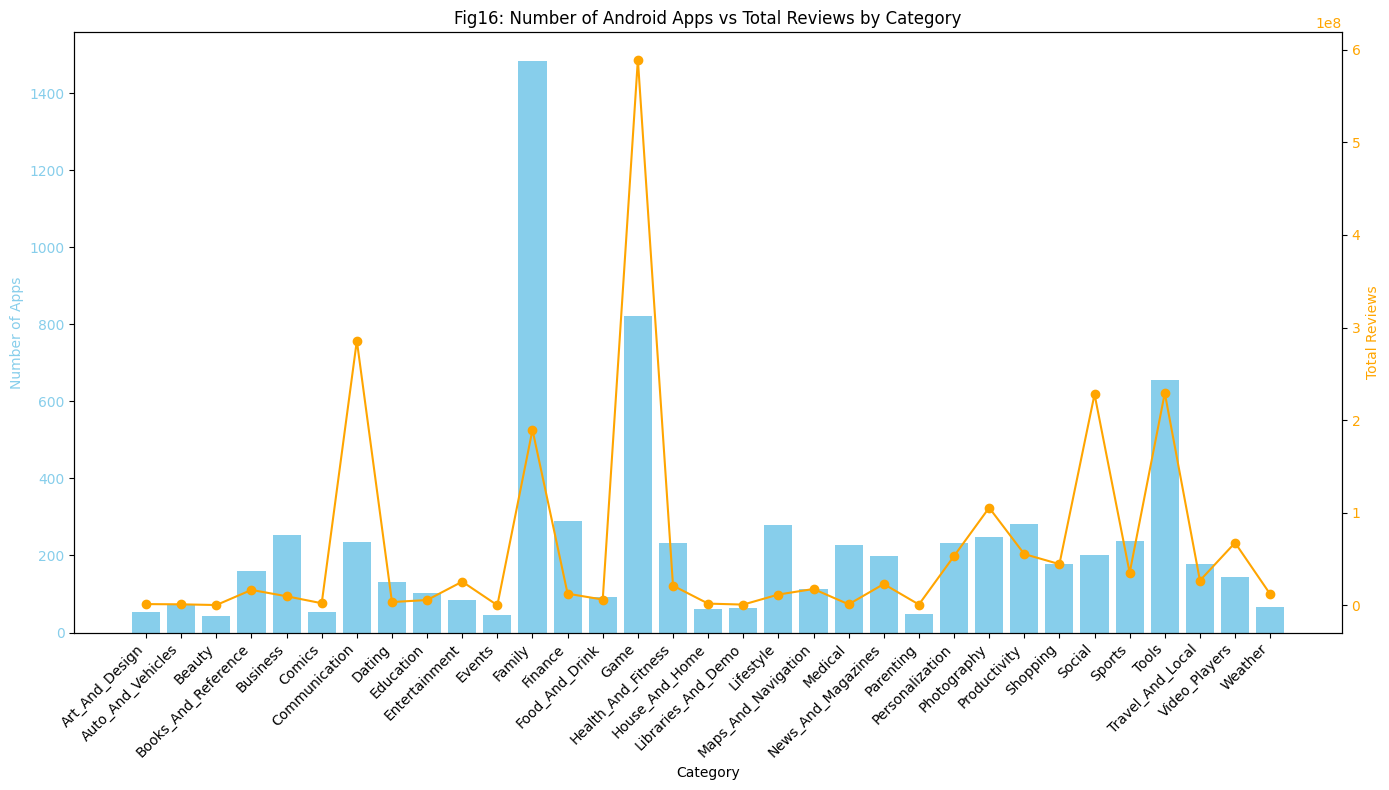

In [68]:
# Android Category Metrics by Total Reviews
android_category_metricsTR = android.groupby('Category').agg({
    'Reviews': 'sum',   # Total reviews per category
    'App': 'count'       # Number of apps per category
}).rename(columns={'App': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(android_category_metricsTR['Category'], android_category_metricsTR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Category')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(android_category_metricsTR['Category'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(android_category_metricsTR['Category'], android_category_metricsTR['Reviews'], color='orange', label='Total Installs', marker='o')
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig16: Number of Android Apps vs Total Reviews by Category')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/1385192025.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(android_category_metricsAR['Category'], rotation=45, ha='right')


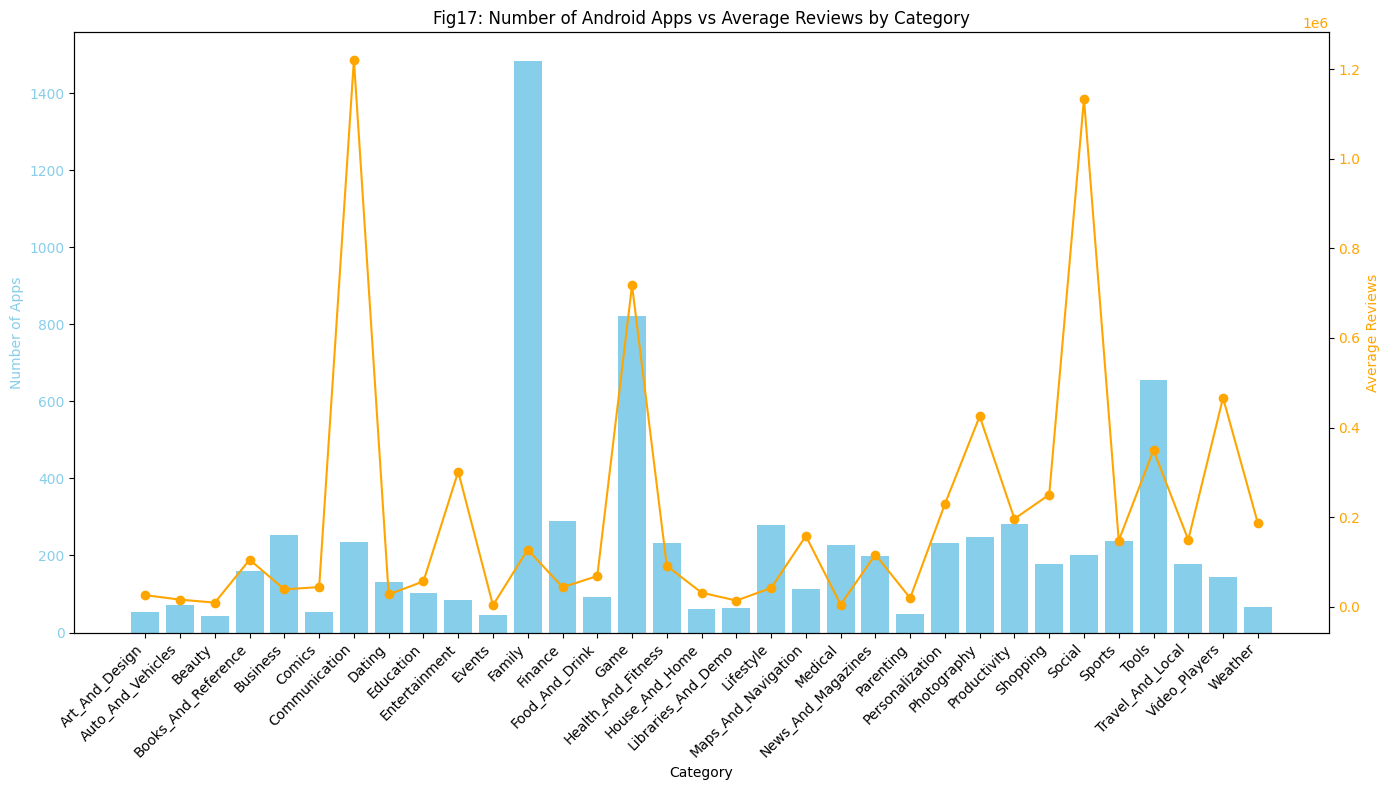

In [69]:
# Android Category Metrics by Average Total Reviews
android_category_metricsAR = android.groupby('Category').agg({
    'Reviews': 'mean',   # Average reviews per category
    'App': 'count'       # Number of apps per category
}).rename(columns={'App': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(android_category_metricsAR['Category'], android_category_metricsAR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Category')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(android_category_metricsAR['Category'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(android_category_metricsAR['Category'], android_category_metricsAR['Reviews'], color='orange', label='Total Installs', marker='o')
ax2.set_ylabel('Average Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig17: Number of Android Apps vs Average Reviews by Category')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/3447750792.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(android_content_metricsTR['Content Rating'], rotation=45, ha='right')


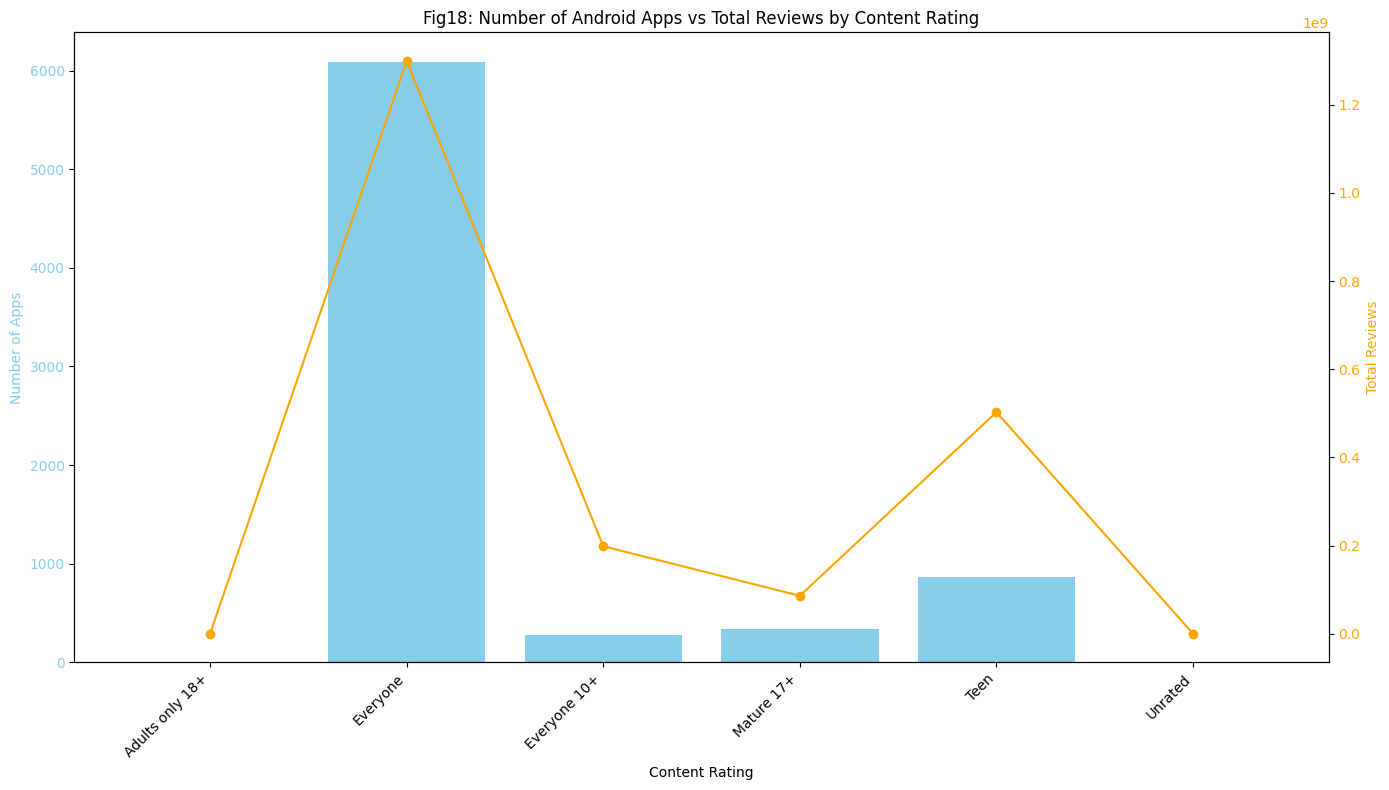

In [70]:
android_content_metricsTR = android.groupby('Content Rating').agg({
    'Reviews': 'sum',   # Total reviews per content rating
    'Content Rating': 'count'       # Number of apps per content rating
}).rename(columns={'Content Rating': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(android_content_metricsTR['Content Rating'], android_content_metricsTR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Content Rating')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(android_content_metricsTR['Content Rating'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(android_content_metricsTR['Content Rating'], android_content_metricsTR['Reviews'], color='orange', label='Total Installs', marker='o')
ax2.set_ylabel('Total Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig18: Number of Android Apps vs Total Reviews by Content Rating')
fig.tight_layout()
plt.show()

/var/folders/qp/lzjb8k5d71g8pghlwm_1xkbr0000gq/T/ipykernel_81746/2569446518.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(android_content_metricsAR['Content Rating'], rotation=45, ha='right')


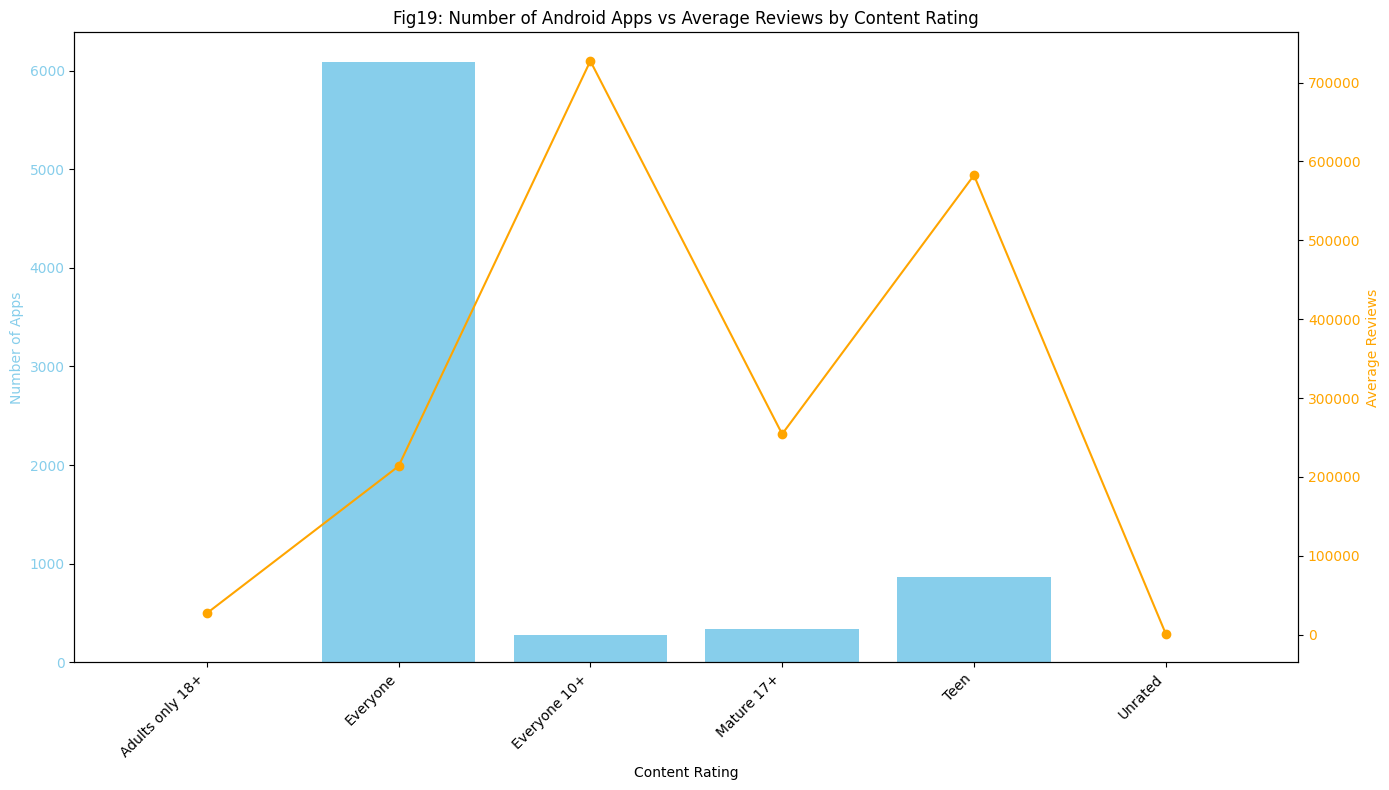

In [71]:
android_content_metricsAR = android.groupby('Content Rating').agg({
    'Reviews': 'mean',   # Average reviews per content rating
    'Content Rating': 'count'   # Number of apps per content rating
}).rename(columns={'Content Rating': 'Number of Apps'}).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for Number of Apps
ax1.bar(android_content_metricsAR['Content Rating'], android_content_metricsAR['Number of Apps'], color='skyblue', label='Number of Apps')
ax1.set_ylabel('Number of Apps', color='skyblue')
ax1.set_xlabel('Content Rating')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(android_content_metricsAR['Content Rating'], rotation=45, ha='right')

# Line chart for Installs
ax2 = ax1.twinx()
ax2.plot(android_content_metricsAR['Content Rating'], android_content_metricsAR['Reviews'], color='orange', label='Total Installs', marker='o')
ax2.set_ylabel('Average Reviews', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
plt.title('Fig19: Number of Android Apps vs Average Reviews by Content Rating')
fig.tight_layout()
plt.show()

### KEY FINDINGS


Engagement

---

I found an intersection in the top categories between both markets. Essentially, the true favorites (measured by categories with equally high total and average reviews) include Social Networking, Communication, Photography & Videography apps. These categories enjoy high demand and equally high satisfaction.

The analysis also revealed that the Games and Entertainment/Family categories are the most saturated categories in both markets, with too many apps flooding the user's short attention span.

Demography

---

In both markets, while apps tagged as being generally suitable for all viewers (Everyone/ 4+) received the most number of reviews, my analysis revealed that there are too many apps within this category vying for user attention; thereby resulting in a poor engagement on an app-basis. Essentially, there are only a few dominating apps within this rating category that have ammassed so many reviews, skewing the result of the analysis in favor of this category.

On the other hand, the teen and pre-teen categories have a lot of passionate and conscious engagement, significantly surpassing the volume of apps in those categories. The consistent result of this category across total and average reviews, and in both markets, signifies its significant potential.

It would appear that the generic nature of the generally suitable apps makes it prone to fickle engagement.

### CONCLUSIONS

Generally, for the sake of recommendation, we would be interested in three trends, including:

- High Total Reviews, Low Average Reviews: This trend signifies a large user base and potentially saturated market, dominated by a few major players. A good example of this trend is the Game category, dominated by apps like Candy Crush, Angry Birds, Subway Surfer etc., in both Android and Apple markets. Investing in apps within this category is not primarily recommended; however, if it is desired, the Company should:

    1. focus on identifying the areas of dissatisfaction among current users in the market, and building apps that soothe the pain points;

    2. invest in unique app features, that encourage regular engagement, drive retention e.g., regular trivias, wide array of styles and designs to select from, personification (e.g., using ones own photograph to create an emoji or avatar), leveraging Artificial Intelligence etc;
    
    3. focus on apps that cater or appeal to pre-teenage or older user groups.

- Low Total Reviews, High Average Reviews: Categories following this trend potentially have too few apps but highly engaged users. Such categories include: Education, Entertainment, Navigation, Weather etc., in both Apple and Android markets, which tend to be niche and hard to get into except there is a tangible offering catering to unmet needs. To thrive in this market, the Company should:

    1. focus on niche offerings e.g., apps serving pre-teenage and older groups;
    
    2. ensure marketing focuses on highlighting specific product offering and word-of-mouth growth to scale total reviews.

    3. collaborate with influencers aligned with the value offering to promote popularity and engagement among users

    4. consider localizing product offering to tap into underserved regions or communities

- High Total Reviews, High Average Reviews: This trend denotes popular and deeply engaging categories with high demand and equally high satisfaction, which most apps in my review fall under. However, the top apps following this trend include: Social Networking, Communication, Photos & Videos, Shopping etc., in both Apple and Android markets. These categories are not saturated, and have significant opportunity for growth. To thrive within this market, the company must:

    1. create truly innovative apps that can scale and potentially sway users from their original favorites;

    2. consider micro-services;
    
    3. focus on user experience and community building;

    4. study the top-performing apps in the category to identify success factors, and replicate or improve upon them e.g., Whatsapp, Instagram, Subway Surfer etc.

### RECOMMENDATIONS

Since the Company is interested in developing apps with significant potential in both markets, it might serve the Company to focus on building apps that meet one or more of the following criteria:

- Something for Teens: For each app in this category, there was almost twice as much engagement from users, which is reasonable. Afterall, teens are inquisitive and curious; most of them are just getting their first phones and want to exercise their new-found freedom with the world placed in their hands! They are at the stage of their lives when they want to learn any and everything, connect with what is going on in the world around them, and learn what is *hip* and *rad*!

Further, the following categories offer room for growth, to the extent that product development is backed by even more indepth research and competitor analysis, since most of them are dominated by global players like Apple, Google, Meta and Microsoft:

- social networking/ communication,
- photo/video,
- shopping etc.

On the other hand, while the game genre is saturated with fragmented user attention, it is an area where creativity knows no bounds, which may offer a fighting share of the market to known brands and newbies alike. People love new challenges, the thrill of learning a new method, or winning a new thing. To this extent, this can also be a profitable option to consider.

Finally, it would be useful to build apps that can scale and eventually tap into the vast possibilities of Artificial Intelligence (AI) as the Company works towards developing new apps, which can make them very attractive to customers over time, thereby increasing revenue by way of user traffic. Notably, some of the successful apps within the dataset used in this analysis, have introduced AI in one form or the other e.g., Whatsapp.